In [2]:
import pandas as pd
import numpy as np

## Data Loading

#### Sensor Storage Temperature dataset

In [3]:
temp_df = pd.read_csv('sensor_storage_temperature.csv')
temp_df.drop(columns=['Unnamed: 0'], inplace=True)
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [4]:
# Checking the shape of the dataset
temp_df.shape

(23890, 3)

#### Sensor stock levels dataset

In [5]:
stock_df = pd.read_csv('sensor_stock_levels.csv')
stock_df.drop(columns=['Unnamed: 0'], inplace=True)
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [6]:
# Checking the shape of the dataset
stock_df.shape

(15000, 4)

#### Sales dataset

In [7]:
sales_df = pd.read_csv('sales.csv')
sales_df.drop(columns=['Unnamed: 0'], inplace=True)
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [8]:
# Checking the shape of the dataset
sales_df.shape
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


### Converting the timestamps to datetime formats

In [9]:
def convert_to_datetime(data: pd.DataFrame=None, column: str=None):
    dummy = data.copy()
    dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
    return dummy
temp_df = convert_to_datetime(temp_df, 'timestamp')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.1+ KB


In [10]:
stock_df = convert_to_datetime(stock_df, 'timestamp')
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [11]:
sales_df = convert_to_datetime(sales_df, 'timestamp')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


### Merging the datasets

Revisiting the problem statement:
```
Can we accurately predict the stock levels of products, based on sales data and sensor data, 
on an hourly basis in order to more intelligently procure products from our suppliers.

```

Since predictions have to be done on an hourly basis, the `timestamp` column on all 3 datasets have to be based on the hour of the day

In [12]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame=None, column: str=None):
    dummy = data.copy()
    new_ts = dummy[column].tolist()
    new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
    new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
    dummy[column] = new_ts
    return dummy

In [13]:
sales_df = convert_timestamp_to_hourly(sales_df, 'timestamp')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [14]:
stock_df = convert_timestamp_to_hourly(stock_df, 'timestamp')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [15]:
temp_df = convert_timestamp_to_hourly(temp_df, 'timestamp')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


Aggregating quantity on the `sales` data by using `timestamp` and `product_id` 

In [16]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


For the `stock` data we aggregate the mean of the `estimated_stock_pct`

In [17]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


This shows us the average stock percentage of each product at unique hours within the week of sample data.

Aggregating the `temperature` data using the mean `temperature`

In [18]:
temp_agg = temp_df.groupby('timestamp').agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


This shows the average temperature of the storage facility where each produce is stored

We now merge the datasets using `stock_agg` as the base table

In [19]:
df = pd.merge(stock_agg, sales_agg, on=['timestamp', 'product_id'], how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [20]:
df = df.merge(temp_agg, on='timestamp', how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


In [21]:
# checking for general info on the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 423.8+ KB


Adding more features into the dataset including the product `category`, `unit_price` and `customer_type`

In [22]:
product_categories = sales_df[['product_id', 'category']].drop_duplicates()
product_price = sales_df[['product_id', 'unit_price']].drop_duplicates()
sales_customer_type = sales_df[['product_id', 'customer_type']].drop_duplicates()

Merging the created tables with the original one

In [23]:
df = df.merge(product_categories, on='product_id', how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885,pets


In [24]:
df = df.merge(product_price, on='product_id', how='left')
df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885,pets,8.19


In [25]:
df = df.merge(sales_customer_type, on='product_id', how='left')
df.tail()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,customer_type
52527,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat,14.99,standard
52528,2022-03-07 19:00:00,f01b189c-6345-4639-a8d1-89e1fc67c443,0.92,3.0,-0.165077,meat,14.99,premium
52529,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,0.01,2.0,-0.165077,beverages,5.19,basic
52530,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,0.01,2.0,-0.165077,beverages,5.19,gold
52531,2022-03-07 19:00:00,f3bec808-bee0-4597-a129-53a3a2805a43,0.01,2.0,-0.165077,beverages,5.19,premium


In [26]:
# Checking for null values
df.isna().sum()

timestamp                  0
product_id                 0
estimated_stock_pct        0
quantity               37423
temperature                0
category                   0
unit_price                 0
customer_type              0
dtype: int64

Based on the information above the column containing null values is the `quantity`. An assumption can be made whereby the null values indicate that there were no sales of this product within this hour. The null values can therefore be replaced with zero

In [27]:
# Replacing null values with 0
df = df.fillna(0)
df.isna().sum()

timestamp              0
product_id             0
estimated_stock_pct    0
quantity               0
temperature            0
category               0
unit_price             0
customer_type          0
dtype: int64

## Pre-processing

The `timestamp` column is not very useful in its current format. It can be exploded into day of the week, month and hour

In [28]:
df['timestamp_month'] = df['timestamp'].dt.day
df['timestamp_day'] = df['timestamp'].dt.dayofweek
df['timestamp_hour'] = df['timestamp'].dt.hour
df.drop(columns=['timestamp'], inplace=True)
df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,customer_type,timestamp_month,timestamp_day,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,premium,1,1,9
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,standard,1,1,9
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,gold,1,1,9
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,basic,1,1,9
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19,non-member,1,1,9


The next step is converting columns that contain categorical variables into numerals. These columns are the `category` and `customer_type`
The `customer_type` does not have many unique values, therefore, dummy columns can be created. The `category` column has alot of unique values and label encoding is therefore used for the conversion

In [29]:
# Label encoding the category column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,customer_type,timestamp_month,timestamp_day,timestamp_hour
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,premium,1,1,9
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,standard,1,1,9
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,gold,1,1,9
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,basic,1,1,9
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,non-member,1,1,9


In [30]:
# Creating dummy variables for the customer_type column
df = pd.get_dummies(df, columns=['customer_type'])
df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_month,timestamp_day,timestamp_hour,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,False,False,False,True,False
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,False,False,False,False,True
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,False,True,False,False,False
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,True,False,False,False,False
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,False,False,True,False,False


In [31]:
# Converting the true and false values to 1s and 0s
columns_to_convert = ['customer_type_basic', 'customer_type_gold', 'customer_type_non-member', 'customer_type_premium', 'customer_type_standard']
df[columns_to_convert] = df[columns_to_convert].astype(int)
df.head()

,product_id,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_month,timestamp_day,timestamp_hour,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,0,0,0,1,0
1,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,0,0,0,0,1
2,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,0,1,0,0,0
3,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,1,0,0,0,0
4,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,11,11.19,1,1,9,0,0,1,0,0


The `product_id` is only a unique identifier and it doesn't contribute to the model. It is, therefore, dropped

In [32]:
df.drop(columns=['product_id'], inplace=True)
df.head()

,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_month,timestamp_day,timestamp_hour,customer_type_basic,customer_type_gold,customer_type_non-member,customer_type_premium,customer_type_standard
0,0.89,3.0,-0.02885,11,11.19,1,1,9,0,0,0,1,0
1,0.89,3.0,-0.02885,11,11.19,1,1,9,0,0,0,0,1
2,0.89,3.0,-0.02885,11,11.19,1,1,9,0,1,0,0,0
3,0.89,3.0,-0.02885,11,11.19,1,1,9,1,0,0,0,0
4,0.89,3.0,-0.02885,11,11.19,1,1,9,0,0,1,0,0


## Modelling

For the model, a supervised machine learning model will be used to predict the `estimated_stock_pct` which is in line with the problem statement.
K-fold cross-validation will be used when training the machine learning model to resample and evaluate the machine learning model.
The main evaluation metric used the `r2_score` and `mean absolute error`

In [39]:
X = df.drop(columns=['estimated_stock_pct'])
y = df['estimated_stock_pct']
print(X.shape)
print(y.shape)

(52532, 12)
(52532,)


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [41]:
model = RandomForestRegressor()
scaler = StandardScaler()

In [42]:
# Splitting the data into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=42)

# Scaling the features that helps the algorithm not to be greedy with large values and also deals with outliers
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Specifying number of folds
num_folds = 10

# Creating a K-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

# Calculating mean absolute error for the predictions
mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error' ,cv=kf)
mae_scores = -mae_scores
# Printing mean_absolute_error for each fold
for fold, mae_fold in enumerate(mae_scores, 1):
    print(f'Fold {fold}: MAE = {mae_fold:.3f}')

# Printing the average mean_absolute_error for the predictions
print(f'Mean Absolute Error = {np.mean(mae_scores):.3f}')

Fold 1: MAE = 0.087
Fold 2: MAE = 0.088
Fold 3: MAE = 0.090
Fold 4: MAE = 0.087
Fold 5: MAE = 0.088
Fold 6: MAE = 0.088
Fold 7: MAE = 0.087
Fold 8: MAE = 0.089
Fold 9: MAE = 0.091
Fold 10: MAE = 0.087
Mean Absolute Error = 0.088


From the observations above it is clear that the `mean_absolute_error` is almost equal across each fold. This shows that the performance of the model is consistent across different samples of data.
The MAE is also low showing that the model's accuracy is good

#### Feature Importance Plot

In [45]:
import matplotlib.pyplot as plt

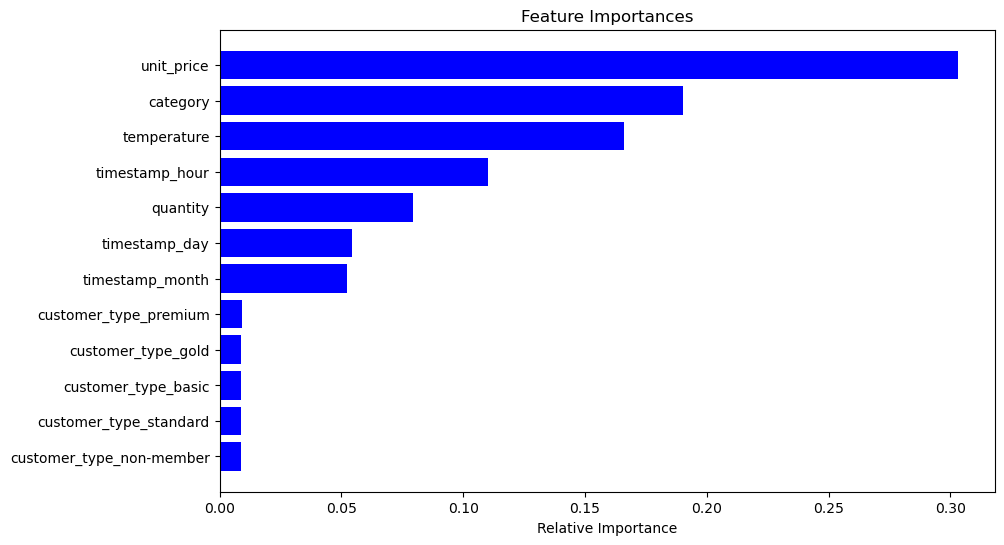

In [46]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the Feature Importance Plot above it is clear that the `unit_price` is very important in predicting the target variable. The `customer_type` were less influential